In [3]:
import numpy as np
import torch
import fastai
import pandas as pd
import csv

from fastai import *
from fastai.text import *
from fastai.text.all import *

In [4]:
print(torch.__version__)

# Set device
torch.cuda.set_device(1)
torch.cuda.current_device()

1.10.2+cu102


1

In [3]:
ds_name = 'train_val_data.csv'
df = pd.read_csv(ds_name)
df.tail()

,audio_id,codeword_indices,codewords,genre,is_valid
634,rock.00081.wav,"[119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 241, 241, 40, 40, 40, 40, 40, 220, 220, 220, 119, 225, 225, 65, 225, 225, 119, 119, 88, 88, 206, 88, 88, 40, 40, 40, 40, 220, 185, 185, 185, 206, 88, 119, 88, 88, 88, 88, 206, 206, 206, 206, 88, 119, 119, 231, 40, 40, 40, 241, 241, 40, 40, 25, 50, 36, 36, 50, 50, 50, 169, 82, 119, 119, 120, 169, 36, 235, 235, 169, 225, 45, 119, 225, 225, 120, 120, 120, 169, 169, 169, 85, 85, 241, 241, 241, 241, 189, 85, 85, 189, 189, 189, 189, 189, 189, 189, 225, 225, 225, 225, 225, 225, 85, 206, 206, 206, 30, 30, 30, 91, 91, 91, 91, 91, 91, 91, ...",x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x241 x241 x40 x40 x40 x40 x40 x220 x220 x220 x119 x225 x225 x65 x225 x225 x119 x119 x88 x88 x206 x88 x88 x40 x40 x40 x40 x220 x185 x185 x185 x206 x88 x119 x88 x88 x88 x88 x206 x206 x206 x206 x88 x119 x119 x231 x40 x40 x40 x241 x241 x40 x40 x25 x50 x36 x36 x50 x50 x50 x169 x82 x119 x119 x120 x169 x36 x235 x235 x169 x225 x45 x119 x225 x225 x120 x120 x120 x169 x169 x169 x85 x85 x241 x241 x241 x241 x189 x85 x85 x189 x189 x189 x189 x189 x189 x189 x225 x225 x225 x225 x225 x225 x85 x206 x206 x206 x30 x30 x30 x91 x91 x91 x91 x91 x91 x91 x...,rock,1
635,rock.00082.wav,"[145, 65, 146, 146, 146, 70, 70, 13, 13, 206, 206, 206, 110, 13, 13, 206, 91, 91, 39, 212, 190, 206, 91, 91, 185, 119, 229, 120, 120, 85, 85, 85, 85, 85, 85, 85, 13, 13, 13, 13, 13, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 85, 50, 36, 36, 235, 235, 235, 235, 85, 85, 13, 13, 13, 13, 13, 85, 85, 119, 82, 82, 82, 82, 82, 82, 82, 173, 189, 82, 25, 120, 146, 146, 146, 146, 146, 13, 13, 13, 206, 206, 220, 206, 206, 206, 185, 185, 185, 185, 185, 149, 149, 160, 160, 88, 225, 36, 36, 65, 65, 225, 85, 85, 85, 85, 85, 13, 13, 13, 13, 13, 13, 13, 13, 206, 206, 206, 206, 185, 91, 13, 65, 65, 1...",x145 x65 x146 x146 x146 x70 x70 x13 x13 x206 x206 x206 x110 x13 x13 x206 x91 x91 x39 x212 x190 x206 x91 x91 x185 x119 x229 x120 x120 x85 x85 x85 x85 x85 x85 x85 x13 x13 x13 x13 x13 x189 x189 x189 x189 x189 x189 x189 x189 x189 x189 x85 x50 x36 x36 x235 x235 x235 x235 x85 x85 x13 x13 x13 x13 x13 x85 x85 x119 x82 x82 x82 x82 x82 x82 x82 x173 x189 x82 x25 x120 x146 x146 x146 x146 x146 x13 x13 x13 x206 x206 x220 x206 x206 x206 x185 x185 x185 x185 x185 x149 x149 x160 x160 x88 x225 x36 x36 x65 x65 x225 x85 x85 x85 x85 x85 x13 x13 x13 x13 x13 x13 x13 x13 x206 x206 x206 x206 x185 x91 x13 x65 x65 x1...,rock,1
636,rock.00083.wav,"[147, 88, 241, 40, 88, 88, 88, 88, 88, 40, 220, 220, 220, 7, 229, 50, 119, 119, 119, 119, 188, 88, 88, 188, 40, 188, 88, 88, 88, 88, 7, 220, 220, 220, 195, 40, 119, 188, 88, 88, 88, 88, 206, 206, 206, 88, 119, 119, 88, 88, 16, 16, 206, 206, 206, 206, 119, 50, 120, 119, 119, 119, 119, 119, 88, 88, 88, 88, 88, 188, 88, 88, 88, 206, 206, 206, 146, 146, 65, 119, 88, 88, 110, 146, 88, 88, 88, 88, 88, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 225, 225, 65, 119, 88, 88, 88, 88, 110, 110, 110, 110, 88, 88, 88, 110, 110, 110, 110, 110, 206, 88, 200, 70, 110, 110, 16, 16, 16, 16, 16, 206, 206, 110, 11...",x147 x88 x241 x40 x88 x88 x88 x88 x88 x40 x220 x220 x220 x7 x229 x50 x119 x119 x119 x119 x188 x88 x88 x188 x40 x188 x88 x88 x88 x88 x7 x220 x220 x220 x195 x40 x119 x188 x88 x88 x88 x88 x206 x206 x206 x88 x119 x119 x88 x88 x16 x16 x206 x206 x206 x206 x119 x50 x120 x119 x119 x119 x119 x119 x88 x88 x88 x88 x88 x188 x88 x88 x88 x206 x206 x206 x146 x146 x65 x119 x88 x88 x110 x146 x88 x88 x88 x88 x88 x16 x16 x16 x16 x16 x16 x16 x16 x16 x16 x225 x225 x65 x119 x88 x88 x88 x88 x110 x110 x110 x110 x88 x88 x88 x110 x110 x110 x110 x110 x206 x88 x200 x70 x110 x110 x16 x16 x16 x16 x16 x206 x206 x110 x11...,rock,1
637,rock.00084.wav,"[23, 146, 65, 65, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 13, 189, 119, 65, 65, 65, 146, 146, 146, 146, 146, 88, 88, 88, 119, 119, 119, 119, 88, 88, 88, 88, 88, 119, 119, 88, 88, 88, 206, 206, 220, 206, 88, 88, 119

### Train AWD-LSTM LM (with fastai) v2 on the codeword sequences

In [4]:
dls = TextDataLoaders.from_df(df, path='./', text_col='codewords', is_lm=True, val_col='is_valid') # bs=64 by default

/home/alu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [5]:
dls.show_batch()

,text,text_
0,xxbos xxwrep 19 x65 x169 x169 x169 x120 xxwrep 5 x65 x169 xxwrep 3 x169 x70 x70 x70 x169 xxwrep 4 x65 x70 xxwrep 7 x70 x110 x146 x65 x146 xxwrep 3 x70 x110 x70 x70 x110 xxwrep 4 x70 x65 x146 x146 xxwrep 4 x70 x120 x120 x70 x70 x169 x169 x65 x65 x146 xxwrep 4 x70 x120 x120 x120 xxwrep 4 x70 x65 x65 xxwrep 3 x146 x85 x169 x169,xxwrep 19 x65 x169 x169 x169 x120 xxwrep 5 x65 x169 xxwrep 3 x169 x70 x70 x70 x169 xxwrep 4 x65 x70 xxwrep 7 x70 x110 x146 x65 x146 xxwrep 3 x70 x110 x70 x70 x110 xxwrep 4 x70 x65 x146 x146 xxwrep 4 x70 x120 x120 x70 x70 x169 x169 x65 x65 x146 xxwrep 4 x70 x120 x120 x120 xxwrep 4 x70 x65 x65 xxwrep 3 x146 x85 x169 x169 xxwrep
1,x206 xxwrep 3 x252 x206 x252 x252 x88 x252 x220 x185 x252 x188 x188 x110 x170 x170 x188 x60 x200 x200 x179 x179 x13 x13 x220 x185 x206 x188 x60 x200 x179 x170 x88 x40 x7 x7 x252 x220 x220 x188 x225 x119 x119 x13 x13 x206 x88 x7 x206 x206 xxwrep 3 x13 x88 x40 x7 x88 x188 x188 x88 x252 x7 x88 x170 xxwrep 3 x231 x119 x119 x88 xxwrep,xxwrep 3 x252 x206 x252 x252 x88 x252 x220 x185 x252 x188 x188 x110 x170 x170 x188 x60 x200 x200 x179 x179 x13 x13 x220 x185 x206 x188 x60 x200 x179 x170 x88 x40 x7 x7 x252 x220 x220 x188 x225 x119 x119 x13 x13 x206 x88 x7 x206 x206 xxwrep 3 x13 x88 x40 x7 x88 x188 x188 x88 x252 x7 x88 x170 xxwrep 3 x231 x119 x119 x88 xxwrep 3
2,4 x189 x206 x189 x40 x185 x91 x189 x225 xxwrep 3 x36 x235 x65 x120 xxwrep 3 x85 x179 xxwrep 4 x13 x119 x82 x119 x231 x54 x82 x82 xxwrep 4 x189 x40 xxwrep 3 x119 x188 x88 x88 x206 x206 x220 x220 x42 x64 x64 x42 x206 x40 x40 x206 x185 x5 x206 x13 xxwrep 3 x189 x85 x225 x127 x65 xxwrep 4 x146 x13 x13 x13 x119 x119 x85 x119,x189 x206 x189 x40 x185 x91 x189 x225 xxwrep 3 x36 x235 x65 x120 xxwrep 3 x85 x179 xxwrep 4 x13 x119 x82 x119 x231 x54 x82 x82 xxwrep 4 x189 x40 xxwrep 3 x119 x188 x88 x88 x206 x206 x220 x220 x42 x64 x64 x42 x206 x40 x40 x206 x185 x5 x206 x13 xxwrep 3 x189 x85 x225 x127 x65 xxwrep 4 x146 x13 x13 x13 x119 x119 x85 x119 x119
3,x82 x225 x235 x225 x225 xxwrep 6 x82 x25 x25 x174 x174 x238 x24 x32 x238 x174 x25 x119 x174 x40 x40 x24 x24 x32 x174 x25 x119 x24 x40 x40 x171 x204 x204 x119 x50 x65 x225 x225 x119 xxwrep 3 x189 x82 xxwrep 3 x25 x241 x40 xxwrep 3 x32 x241 xxwrep 3 x119 x189 xxwrep 4 x40 x189 x85 x243 x243 xxwrep 4 x241 x199 x119 xxwrep 3 x65,x225 x235 x225 x225 xxwrep 6 x82 x25 x25 x174 x174 x238 x24 x32 x238 x174 x25 x119 x174 x40 x40 x24 x24 x32 x174 x25 x119 x24 x40 x40 x171 x204 x204 x119 x50 x65 x225 x225 x119 xxwrep 3 x189 x82 xxwrep 3 x25 x241 x40 xxwrep 3 x32 x241 xxwrep 3 x119 x189 xxwrep 4 x40 x189 x85 x243 x243 xxwrep 4 x241 x199 x119 xxwrep 3 x65 x85
4,x8 x36 x50 x82 x82 x174 x231 x231 x119 x65 x45 xxwrep 6 x54 x170 x20 x127 x127 x146 x188 x253 x252 x252 x117 x117 xxwrep 3 x170 x206 x33 x141 x7 x231 x95 x186 x188 x8 x8 x218 x146 x23 x206 x185 x149 x19 x91 x146 x119 x80 x141 x149 x149 x133 x19 x19 x150 x65 x65 x114 x146 x170 x206 x242 x81 x81 x9 xxwrep 4 x206 x149 x177 x176,x36 x50 x82 x82 x174 x231 x231 x119 x65 x45 xxwrep 6 x54 x170 x20 x127 x127 x146 x188 x253 x252 x252 x117 x117 xxwrep 3 x170 x206 x33 x141 x7 x231 x95 x186 x188 x8 x8 x218 x146 x23 x206 x185 x149 x19 x91 x146 x119 x80 x141 x149 x149 x133 x19 x19 x150 x65 x65 x114 x146 x170 x206 x242 x81 x81 x9 xxwrep 4 x206 x149 x177 x176 x19
5,x63 x201 x201 x226 x22 x22 x209 x63 x63 x31 x63 x63 x226 x226 x157 x79 x157 x157 x22 xxwrep 4 x34 x9 xxwrep 10 x9 x240 x63 x128 x48 xxwrep 4 x128 x182 xxwrep 3 x254 x157 x157 xxwrep 4 x151 x226 xxwrep 3 x226 x201 x63 x48 x79 x79 x254 x128 x128 x182 x254 x182 xxwrep 5 x151 x157 x157 xxwrep 3 x22 x209 x22 xxwrep 4 x157 x22 x22,x201 x201 x226 x22 x22 x209 x63 x63 x31 x63 x63 x226 x226 x157 x79 x157 x157 x22 xxwrep 4 x34 x9 xxwrep 10 x9 x240 x63 x128 x48 xxwrep 4 x128 x182 xxwrep 3 x254 x157 x157 xxwrep 4 x151 x226 xxwrep 3 x226 x201 x63 x48 x79 x79 x254 x128 x128 x182 x254 x182 xxwrep 5 x151 x157 x157 xxwrep 3 x22 x209 x22 xxwrep 4 x157 x22 x22 x23
6,x119 x188 x16 x81 x81 x219 x125 xxwrep 3 x97 x15

In [6]:
learn = language_model_learner(dls, AWD_LSTM)
learn.unfreeze()

SuggestedLRs(valley=0.0006918309954926372)

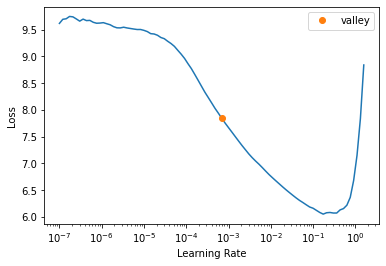

In [7]:
learn.lr_find()

In [8]:
bs = 64
# lr = 1e-2
lr = 1e-3
# lr *= bs/48

learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,time
0,4.516425,4.425802,00:23


epoch,train_loss,valid_loss,time
0,4.357814,4.518640,00:22
1,3.985635,3.791252,00:23
2,3.398251,3.157612,00:23
3,2.920792,2.747800,00:23
4,2.737546,2.664410,00:23
5,2.631451,2.604373,00:22
6,2.576051,2.550484,00:23
7,2.551800,2.521546,00:23
8,2.510392,2.503356,00:22
9,2.484376,2.482542,00:23


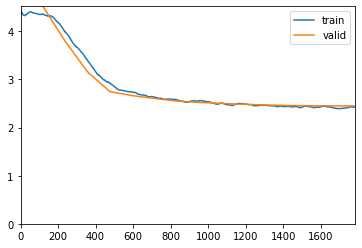

In [9]:
learn.fit_one_cycle(15, lr, cbs=[ShowGraphCallback()])

In [ ]:
# learn.fit_one_cycle(5, lr, cbs=[ShowGraphCallback()])

In [10]:
learn.to_fp32().save_encoder('codeword_lm')

In [11]:
learn.summary()

SequentialRNN (Input shape: 64 x 72)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 72 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 72 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
____________________________________________________________________________
                     64 x 72 x 328       
Linear                                    131528     True      
RNNDropout                                                     
____________________________________________________________________________

Total params: 131,528
Total t

### AWD-LSTM architecture

In [12]:
learn.model[0]

AWD_LSTM(
  (encoder): Embedding(328, 400, padding_idx=1)
  (encoder_dp): EmbeddingDropout(
    (emb): Embedding(328, 400, padding_idx=1)
  )
  (rnns): ModuleList(
    (0): WeightDropout(
      (module): LSTM(400, 1152, batch_first=True)
    )
    (1): WeightDropout(
      (module): LSTM(1152, 1152, batch_first=True)
    )
    (2): WeightDropout(
      (module): LSTM(1152, 400, batch_first=True)
    )
  )
  (input_dp): RNNDropout()
  (hidden_dps): ModuleList(
    (0): RNNDropout()
    (1): RNNDropout()
    (2): RNNDropout()
  )
)

### Finetune AWD-LSTM classifier on GTZAN genre training labels

In [8]:
train_df = pd.read_csv('train_val_data.csv')

In [9]:
train_df.tail()

,audio_id,codeword_indices,codewords,genre,is_valid
634,rock.00081.wav,"[119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 241, 241, 40, 40, 40, 40, 40, 220, 220, 220, 119, 225, 225, 65, 225, 225, 119, 119, 88, 88, 206, 88, 88, 40, 40, 40, 40, 220, 185, 185, 185, 206, 88, 119, 88, 88, 88, 88, 206, 206, 206, 206, 88, 119, 119, 231, 40, 40, 40, 241, 241, 40, 40, 25, 50, 36, 36, 50, 50, 50, 169, 82, 119, 119, 120, 169, 36, 235, 235, 169, 225, 45, 119, 225, 225, 120, 120, 120, 169, 169, 169, 85, 85, 241, 241, 241, 241, 189, 85, 85, 189, 189, 189, 189, 189, 189, 189, 225, 225, 225, 225, 225, 225, 85, 206, 206, 206, 30, 30, 30, 91, 91, 91, 91, 91, 91, 91, ...",x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x119 x241 x241 x40 x40 x40 x40 x40 x220 x220 x220 x119 x225 x225 x65 x225 x225 x119 x119 x88 x88 x206 x88 x88 x40 x40 x40 x40 x220 x185 x185 x185 x206 x88 x119 x88 x88 x88 x88 x206 x206 x206 x206 x88 x119 x119 x231 x40 x40 x40 x241 x241 x40 x40 x25 x50 x36 x36 x50 x50 x50 x169 x82 x119 x119 x120 x169 x36 x235 x235 x169 x225 x45 x119 x225 x225 x120 x120 x120 x169 x169 x169 x85 x85 x241 x241 x241 x241 x189 x85 x85 x189 x189 x189 x189 x189 x189 x189 x225 x225 x225 x225 x225 x225 x85 x206 x206 x206 x30 x30 x30 x91 x91 x91 x91 x91 x91 x91 x...,rock,1
635,rock.00082.wav,"[145, 65, 146, 146, 146, 70, 70, 13, 13, 206, 206, 206, 110, 13, 13, 206, 91, 91, 39, 212, 190, 206, 91, 91, 185, 119, 229, 120, 120, 85, 85, 85, 85, 85, 85, 85, 13, 13, 13, 13, 13, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 85, 50, 36, 36, 235, 235, 235, 235, 85, 85, 13, 13, 13, 13, 13, 85, 85, 119, 82, 82, 82, 82, 82, 82, 82, 173, 189, 82, 25, 120, 146, 146, 146, 146, 146, 13, 13, 13, 206, 206, 220, 206, 206, 206, 185, 185, 185, 185, 185, 149, 149, 160, 160, 88, 225, 36, 36, 65, 65, 225, 85, 85, 85, 85, 85, 13, 13, 13, 13, 13, 13, 13, 13, 206, 206, 206, 206, 185, 91, 13, 65, 65, 1...",x145 x65 x146 x146 x146 x70 x70 x13 x13 x206 x206 x206 x110 x13 x13 x206 x91 x91 x39 x212 x190 x206 x91 x91 x185 x119 x229 x120 x120 x85 x85 x85 x85 x85 x85 x85 x13 x13 x13 x13 x13 x189 x189 x189 x189 x189 x189 x189 x189 x189 x189 x85 x50 x36 x36 x235 x235 x235 x235 x85 x85 x13 x13 x13 x13 x13 x85 x85 x119 x82 x82 x82 x82 x82 x82 x82 x173 x189 x82 x25 x120 x146 x146 x146 x146 x146 x13 x13 x13 x206 x206 x220 x206 x206 x206 x185 x185 x185 x185 x185 x149 x149 x160 x160 x88 x225 x36 x36 x65 x65 x225 x85 x85 x85 x85 x85 x13 x13 x13 x13 x13 x13 x13 x13 x206 x206 x206 x206 x185 x91 x13 x65 x65 x1...,rock,1
636,rock.00083.wav,"[147, 88, 241, 40, 88, 88, 88, 88, 88, 40, 220, 220, 220, 7, 229, 50, 119, 119, 119, 119, 188, 88, 88, 188, 40, 188, 88, 88, 88, 88, 7, 220, 220, 220, 195, 40, 119, 188, 88, 88, 88, 88, 206, 206, 206, 88, 119, 119, 88, 88, 16, 16, 206, 206, 206, 206, 119, 50, 120, 119, 119, 119, 119, 119, 88, 88, 88, 88, 88, 188, 88, 88, 88, 206, 206, 206, 146, 146, 65, 119, 88, 88, 110, 146, 88, 88, 88, 88, 88, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 225, 225, 65, 119, 88, 88, 88, 88, 110, 110, 110, 110, 88, 88, 88, 110, 110, 110, 110, 110, 206, 88, 200, 70, 110, 110, 16, 16, 16, 16, 16, 206, 206, 110, 11...",x147 x88 x241 x40 x88 x88 x88 x88 x88 x40 x220 x220 x220 x7 x229 x50 x119 x119 x119 x119 x188 x88 x88 x188 x40 x188 x88 x88 x88 x88 x7 x220 x220 x220 x195 x40 x119 x188 x88 x88 x88 x88 x206 x206 x206 x88 x119 x119 x88 x88 x16 x16 x206 x206 x206 x206 x119 x50 x120 x119 x119 x119 x119 x119 x88 x88 x88 x88 x88 x188 x88 x88 x88 x206 x206 x206 x146 x146 x65 x119 x88 x88 x110 x146 x88 x88 x88 x88 x88 x16 x16 x16 x16 x16 x16 x16 x16 x16 x16 x225 x225 x65 x119 x88 x88 x88 x88 x110 x110 x110 x110 x88 x88 x88 x110 x110 x110 x110 x110 x206 x88 x200 x70 x110 x110 x16 x16 x16 x16 x16 x206 x206 x110 x11...,rock,1
637,rock.00084.wav,"[23, 146, 65, 65, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 13, 189, 119, 65, 65, 65, 146, 146, 146, 146, 146, 88, 88, 88, 119, 119, 119, 119, 88, 88, 88, 88, 88, 119, 119, 88, 88, 88, 206, 206, 220, 206, 88, 88, 119

In [10]:
dls_train = TextDataLoaders.from_df(train_df, text_col='codewords', label_col='genre')

/home/alu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
# Define our text classifier
genre_learner = text_classifier_learner(dls_train, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, Perplexity()])
# Load the pretrained encoder
genre_learner = genre_learner.load_encoder('codeword_lm')

* https://docs.fast.ai/tutorial.text.html

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.978652,1.823053,0.362205,6.190729,00:07


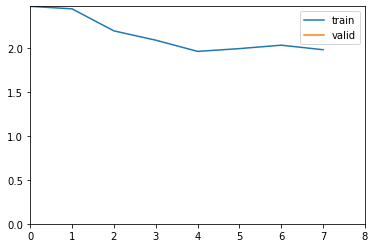

In [23]:
genre_learner.fit_one_cycle(1, 2e-2, cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.614094,1.643149,0.472441,5.171426,00:08
1,1.457296,1.469687,0.464567,4.347874,00:08
2,1.274985,1.401895,0.535433,4.062891,00:08


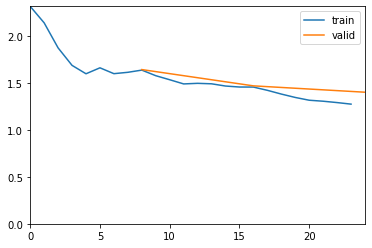

In [24]:
# unfreeze the last two layers
genre_learner.freeze_to(-2)
genre_learner.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2),cbs=[ShowGraphCallback()])

In [28]:
genre_learner.save('genre_learner')

Path('models/genre_learner.pth')

In [12]:
genre_learner.load('genre_learner')

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.942100,0.896944,0.700787,2.452098,00:13
1,0.866705,0.853891,0.716535,2.348768,00:13
2,0.764396,0.809274,0.763780,2.246276,00:13


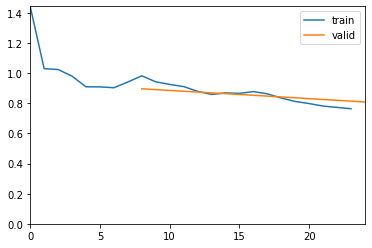

In [13]:
# unfreeze the last three layers
genre_learner.freeze_to(-4)
genre_learner.fit_one_cycle(3, slice(5e-3/(2.6**4),5e-3), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.581825,0.782658,0.732283,2.187278,00:13


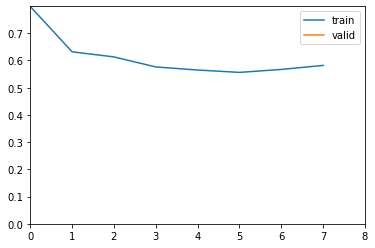

In [14]:
genre_learner.freeze_to(-6)
genre_learner.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.444257,0.751517,0.740157,2.120213,00:13
1,0.414060,0.747784,0.755906,2.112314,00:13


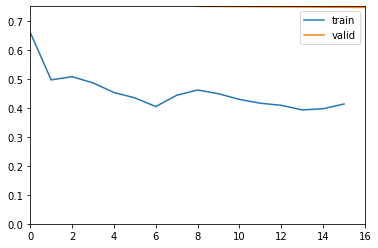

In [15]:
# unfreeze the whole model
genre_learner.unfreeze()
genre_learner.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.360922,0.748450,0.763780,2.113721,00:13
1,0.339354,0.748582,0.755906,2.114001,00:13


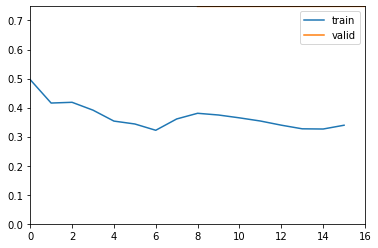

In [16]:
genre_learner.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), cbs=[ShowGraphCallback()])

In [30]:
# genre_lea/rner.save('genre_learner')
genre_learner.export('genre_classifier')

In [36]:
genre_learner = load_learner('genre_classifier')

### Apply the finetuned AWD-LSTM classfier on test data

In [17]:
test_df = pd.read_csv('test_data.csv')

In [40]:
len(test_df)

290

In [39]:
test_df.tail()

,audio_id,codeword_indices,codewords,genre,is_valid
285,rock.00086.wav,"[119, 119, 119, 119, 60, 60, 119, 119, 119, 119, 119, 85, 169, 169, 119, 119, 119, 65, 225, 225, 225, 82, 82, 82, 174, 174, 82, 174, 54, 174, 174, 25, 169, 25, 25, 25, 174, 174, 174, 82, 174, 169, 169, 25, 85, 146, 146, 85, 241, 241, 82, 82, 119, 119, 85, 85, 189, 241, 241, 40, 241, 82, 82, 82, 82, 246, 189, 189, 189, 189, 82, 169, 169, 243, 241, 241, 241, 241, 241, 241, 241, 82, 82, 82, 82, 82, 82, 82, 246, 85, 85, 82, 241, 199, 199, 189, 212, 212, 212, 85, 85, 241, 241, 241, 241, 241, 199, 241, 82, 169, 25, 241, 241, 199, 199, 199, 199, 199, 241, 82, 82, 241, 241, 199, 199, 199, 171, 171...",x119 x119 x119 x119 x60 x60 x119 x119 x119 x119 x119 x85 x169 x169 x119 x119 x119 x65 x225 x225 x225 x82 x82 x82 x174 x174 x82 x174 x54 x174 x174 x25 x169 x25 x25 x25 x174 x174 x174 x82 x174 x169 x169 x25 x85 x146 x146 x85 x241 x241 x82 x82 x119 x119 x85 x85 x189 x241 x241 x40 x241 x82 x82 x82 x82 x246 x189 x189 x189 x189 x82 x169 x169 x243 x241 x241 x241 x241 x241 x241 x241 x82 x82 x82 x82 x82 x82 x82 x246 x85 x85 x82 x241 x199 x199 x189 x212 x212 x212 x85 x85 x241 x241 x241 x241 x241 x199 x241 x82 x169 x25 x241 x241 x199 x199 x199 x199 x199 x241 x82 x82 x241 x241 x199 x199 x199 x171 x171...,rock,0
286,rock.00087.wav,"[146, 146, 146, 146, 146, 146, 109, 146, 65, 119, 119, 13, 13, 13, 13, 13, 85, 127, 127, 120, 120, 120, 119, 85, 85, 120, 169, 169, 163, 120, 85, 85, 85, 85, 13, 40, 50, 8, 8, 127, 65, 65, 119, 119, 119, 119, 119, 119, 229, 229, 119, 60, 24, 24, 24, 231, 60, 229, 229, 65, 119, 119, 188, 119, 119, 119, 119, 119, 119, 119, 188, 188, 188, 188, 119, 119, 50, 8, 36, 127, 65, 65, 119, 119, 119, 119, 25, 25, 119, 119, 119, 119, 119, 119, 119, 25, 229, 84, 120, 119, 188, 88, 80, 88, 231, 119, 60, 60, 119, 188, 231, 40, 40, 40, 231, 25, 8, 8, 36, 50, 225, 225, 225, 225, 82, 50, 127, 127, 229, 82, 8...",x146 x146 x146 x146 x146 x146 x109 x146 x65 x119 x119 x13 x13 x13 x13 x13 x85 x127 x127 x120 x120 x120 x119 x85 x85 x120 x169 x169 x163 x120 x85 x85 x85 x85 x13 x40 x50 x8 x8 x127 x65 x65 x119 x119 x119 x119 x119 x119 x229 x229 x119 x60 x24 x24 x24 x231 x60 x229 x229 x65 x119 x119 x188 x119 x119 x119 x119 x119 x119 x119 x188 x188 x188 x188 x119 x119 x50 x8 x36 x127 x65 x65 x119 x119 x119 x119 x25 x25 x119 x119 x119 x119 x119 x119 x119 x25 x229 x84 x120 x119 x188 x88 x80 x88 x231 x119 x60 x60 x119 x188 x231 x40 x40 x40 x231 x25 x8 x8 x36 x50 x225 x225 x225 x225 x82 x50 x127 x127 x229 x82 x8...,rock,0
287,rock.00088.wav,"[25, 25, 25, 25, 246, 246, 32, 189, 189, 189, 171, 171, 171, 185, 171, 185, 230, 91, 91, 206, 189, 225, 225, 235, 225, 225, 85, 85, 189, 206, 4, 4, 230, 230, 230, 230, 230, 91, 91, 230, 230, 223, 15, 160, 149, 160, 160, 160, 199, 25, 169, 120, 85, 119, 119, 119, 174, 241, 241, 241, 246, 246, 241, 241, 241, 85, 82, 246, 246, 246, 246, 246, 241, 241, 241, 241, 82, 82, 50, 36, 235, 235, 235, 169, 169, 25, 25, 241, 241, 241, 241, 241, 25, 85, 85, 85, 85, 85, 85, 85, 85, 85, 82, 82, 82, 241, 25, 25, 120, 120, 85, 85, 85, 241, 241, 241, 241, 241, 241, 241, 241, 189, 189, 189, 171, 185, 185, 230,...",x25 x25 x25 x25 x246 x246 x32 x189 x189 x189 x171 x171 x171 x185 x171 x185 x230 x91 x91 x206 x189 x225 x225 x235 x225 x225 x85 x85 x189 x206 x4 x4 x230 x230 x230 x230 x230 x91 x91 x230 x230 x223 x15 x160 x149 x160 x160 x160 x199 x25 x169 x120 x85 x119 x119 x119 x174 x241 x241 x241 x246 x246 x241 x241 x241 x85 x82 x246 x246 x246 x246 x246 x241 x241 x241 x241 x82 x82 x50 x36 x235 x235 x235 x169 x169 x25 x25 x241 x241 x241 x241 x241 x25 x85 x85 x85 x85 x85 x85 x85 x85 x85 x82 x82 x82 x241 x25 x25 x120 x120 x85 x85 x85 x241 x241 x241 x241 x241 x241 x241 x241 x189 x189 x189 x171 x185 x185 x230 ...,rock,0
288,rock.00089.wav,"[149, 149, 149, 149, 160, 176, 220, 88, 88, 220, 220, 220, 220, 171, 49, 49, 49, 49, 195, 188, 88, 220, 42, 166, 166, 166, 166, 166, 166, 176, 185, 252, 185, 185, 166, 166, 166, 166, 166, 166, 176, 185, 119, 169, 119, 119, 40, 40, 220, 49, 49, 

In [41]:
genre_learner.predict(test_df['codewords'][0])[0]

'jazz'

In [38]:
test_df['genre'][0]

'blues'

In [34]:
# test_df['codewords'][0]

In [52]:
num_accu = 0

for i in range(len(test_df)):
    pred = genre_learner.predict(test_df['codewords'][i])
    if test_df['genre'][i] == pred:
        num_accu += 1